In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller

In [56]:
pairs = {
    "SPY-VOO": ("SPY", "VOO"),
    "GOOGL-GOOG": ("GOOGL", "GOOG")
}

data = yf.download([ticker for pair in pairs.values() for ticker in pair],
                   start="2023-03-01", end="2024-03-01")['Close']

spy, voo = data[pairs["SPY-VOO"][0]], data[pairs["SPY-VOO"][1]]
googl, goog = data[pairs["GOOGL-GOOG"][0]], data[pairs["GOOGL-GOOG"][1]]

def check_cointegration(series1, series2):
    score, p_value, _ = coint(series1, series2)
    return p_value

[*********************100%***********************]  4 of 4 completed


In [58]:
voo_coef = np.polyfit(voo, spy, 1)[0]
spy_voo_spread = spy - voo_coef * voo

spy_voo_adf = adfuller(spy_voo_spread)[0]

goog_coef = np.polyfit(goog, googl, 1)[0]
googl_goog_spread = googl - goog_coef * goog

googl_goog_adf = adfuller(googl_goog_spread)[0]

results_df = pd.DataFrame({
    "Pair": ["SPY-VOO", "GOOGL-GOOG"],
    "Cointegration p-value": [check_cointegration(spy, voo), check_cointegration(googl, goog)],
    "ADF Test Statistic": [spy_voo_adf, googl_goog_adf]
})
print(results_df)

         Pair  Cointegration p-value  ADF Test Statistic
0     SPY-VOO               0.253615           -2.552389
1  GOOGL-GOOG               0.296054           -2.457072


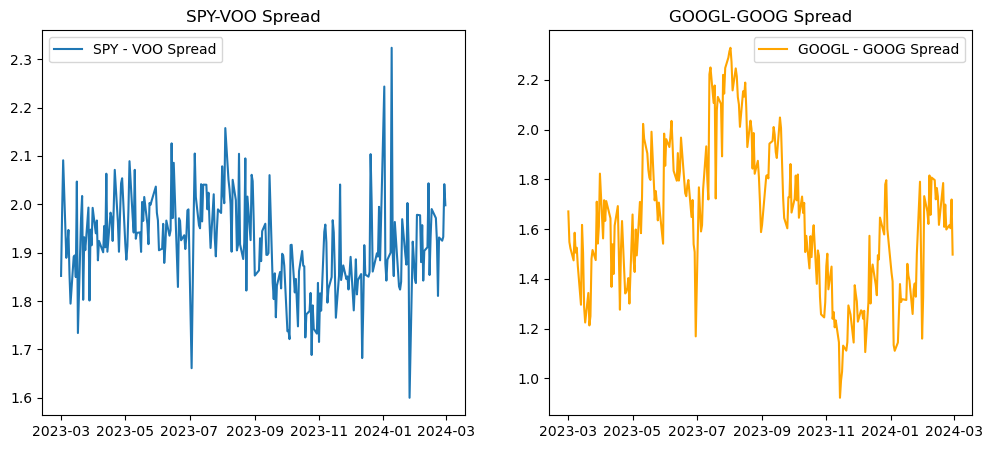

In [60]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(spy_voo_spread, label="SPY - VOO Spread")
plt.title("SPY-VOO Spread")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(googl_goog_spread, label="GOOGL - GOOG Spread", color='orange')
plt.title("GOOGL-GOOG Spread")
plt.legend()

plt.show()